In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Q.Increase Brightness

In [2]:
image = cv2.imread('dog.jpg')

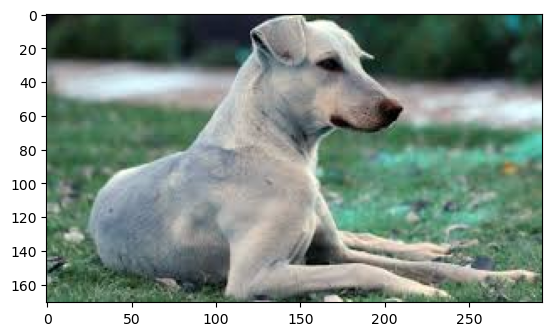

In [3]:
plt.imshow(image)
plt.show()

For modifying brightness HSV format is used

hue, saturation and value

change in value changes brightness

In [4]:

brightness_value = 50 

# ==== RGB (BGR in OpenCV) Approach ====
bgr_bright = cv2.add(image, np.full(image.shape, brightness_value, dtype=np.uint8))

# ==== HSV Approach ====
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)# need to split and then merge
v = cv2.add(v, brightness_value)
hsv_bright = cv2.merge((h, s, v))
bright_image_hsv = cv2.cvtColor(hsv_bright, cv2.COLOR_HSV2BGR)


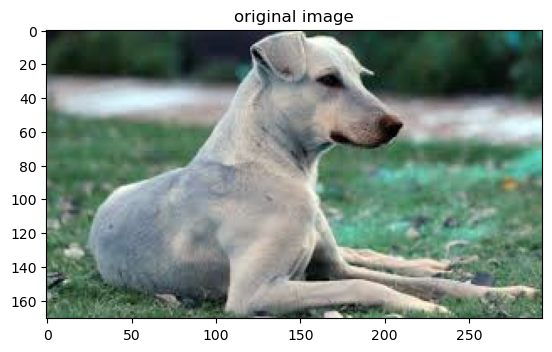

In [5]:
plt.imshow(image)
plt.title('original image')
plt.show()

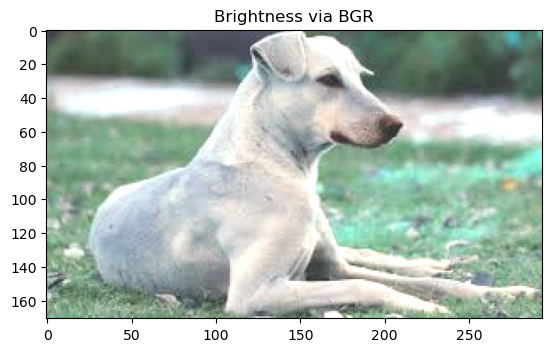

In [6]:
plt.imshow(bgr_bright)
plt.title("Brightness via BGR")
plt.show()

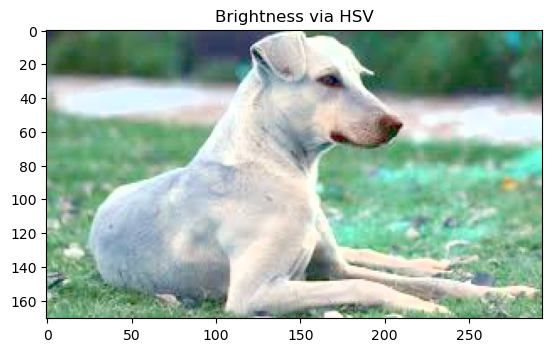

In [7]:
plt.imshow(bright_image_hsv)
plt.title("Brightness via HSV")
plt.show()

## Changing constrast

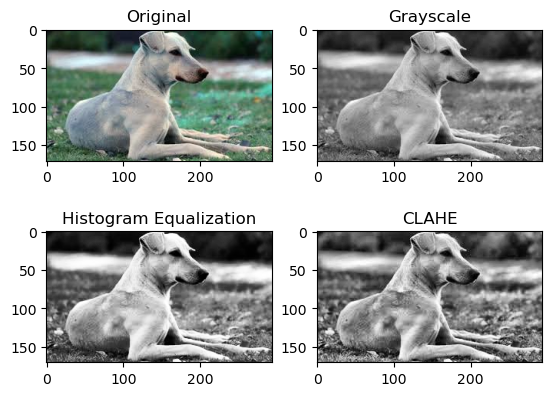

In [9]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
hist_eq = cv2.equalizeHist(gray)


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)


contrast_image = cv2.convertScaleAbs(image, alpha=1.5, beta=0)

# Display results
plt.subplot(221), plt.imshow(image), plt.title('Original')
plt.subplot(222), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(223), plt.imshow(hist_eq, cmap='gray'), plt.title('Histogram Equalization')
plt.subplot(224), plt.imshow(clahe_img, cmap='gray'), plt.title('CLAHE')
plt.show()

## Removing noise using filters

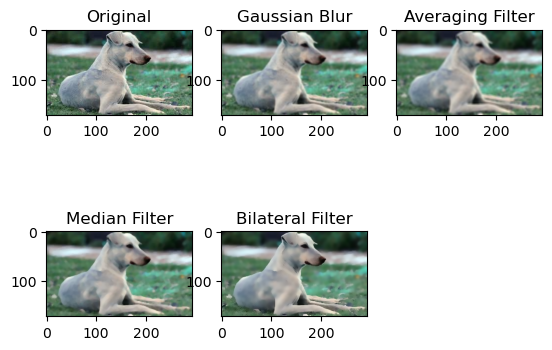

In [10]:
gaussian_blur = cv2.GaussianBlur(image, (5,5), 0)  # Gaussian Blur
average_blur = cv2.blur(image, (5,5))  # Averaging Filter

#Non-Linear Filters
median_blur = cv2.medianBlur(image, 5)  # Median Filter (Non-linear)
bilateral_blur = cv2.bilateralFilter(image, 9, 75, 75)  # Bilateral Filter


plt.subplot(231), plt.imshow(image), plt.title('Original')
plt.subplot(232), plt.imshow(gaussian_blur), plt.title('Gaussian Blur')
plt.subplot(233), plt.imshow(average_blur), plt.title('Averaging Filter')
plt.subplot(234), plt.imshow(median_blur), plt.title('Median Filter')
plt.subplot(235), plt.imshow(bilateral_blur), plt.title('Bilateral Filter')
plt.show()

## Edge detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


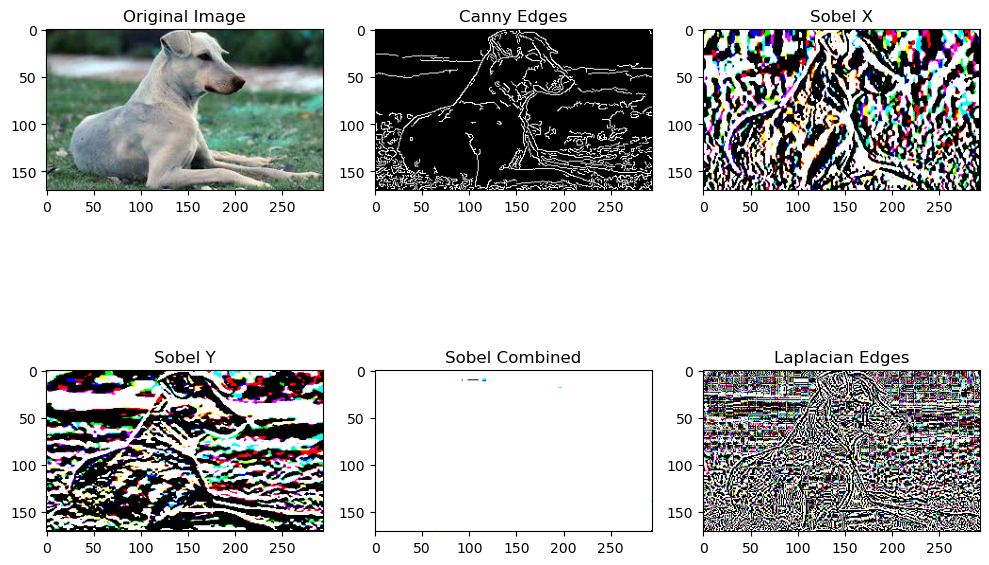

In [11]:
#  edge detection
canny_edges = cv2.Canny(image, 100, 200)

# Sobel edge detection (X and Y direction)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Sobel in X-direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Sobel in Y-direction
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Combined Sobel

#Laplacian edge detection
laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)


plt.figure(figsize=(10, 8))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(233), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(234), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(235), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined')
plt.subplot(236), plt.imshow(laplacian_edges, cmap='gray'), plt.title('Laplacian Edges')

plt.tight_layout()